In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Codec Performance

Saving Evaluation Performance Multiscale Plot


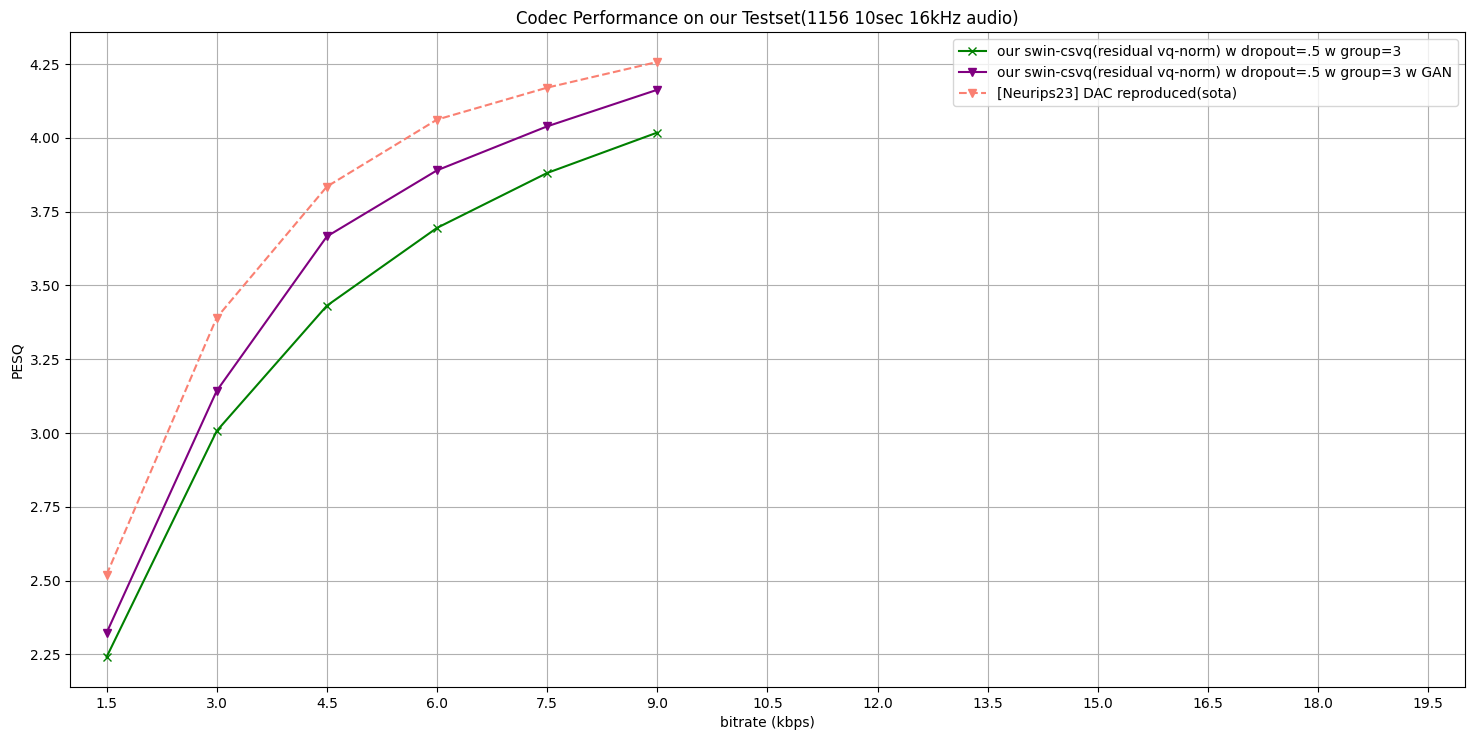

In [5]:
print("Saving Evaluation Performance Multiscale Plot")
csvq_residual = np.array([2.4, 2.7, 2.93, 3.2, 3.3, 3.32])
csvq_merge = np.array([2.5, 3.2, 3.6, 3.85, 4.0, 4.1])
csvq_merge_gan = np.array([2.81, 3.59, 3.83, 4.03, 4.1, 4.25])


swin_csvq_residual_ema = np.array([2.679, 3.426, 3.773, 3.970, 4.070, 4.133]) # with no vq normalization, but trained by ema
swin_csvq_residual_baseline = np.array([2.922, 3.579, 3.869, 4.101, 4.189, 4.194]) # with vq normalization
swin_csvq_residual_baseline_effective_bps = np.array([2.447, 5.024, 6.983, 9.765, 12.521, 14.034])
swin_csvq_residual_vq_control = np.array([2.278, 2.694, 2.957, 3.260, 3.492, 3.666]) # with no vq normalization
swin_csvq_residual_dropout_control = np.array([2.702, 3.498, 3.804, 4.057, 4.209, 4.290])

swin_csvq_residual_9k = np.array([2.241, 3.007, 3.4313, 3.695, 3.881, 4.018])
swin_csvq_residual_9k_gan = np.array([2.323, 3.143, 3.666, 3.890, 4.039, 4.163])

plt.figure(figsize=(18,8.5))
plt.title("Codec Performance on our Testset(1156 10sec 16kHz audio)")
plt.xlim((1,20))
plt.xticks(np.arange(1.5,21,1.5))

# Ours
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_ema), marker='x', color='green', label="our swin-csvq(residual ema)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_baseline), marker='x', color='blue', label="our swin-csvq(residual vq-norm)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), swin_csvq_residual_dropout_control, marker='o', color='tab:blue', label="our swin-csvq(residual vq-norm) w dropout=.5")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_vq_control), marker='x', color='purple', label="our swin-csvq(residual no ema)")
# plt.plot(swin_csvq_residual_baseline_effective_bps, swin_csvq_residual_baseline, marker='x', color='purple', label="our swin-csvq(residual vq-norm) effective")
plt.plot(np.array([b*1.5 for b in range(1, 7)]), swin_csvq_residual_9k, marker='x', color='green', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3")
plt.plot(np.array([b*1.5 for b in range(1, 7)]), swin_csvq_residual_9k_gan, marker='v', color='purple', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3 w GAN")

# CSVQ Source Paper
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_residual, linestyle='--', marker='v', color='blue', label="[Jiang, 2022] csvq(residual)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge, linestyle='--', marker='v', color='c', label="[Jiang, 2022] csvq(merge)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge_gan, linestyle='--', marker='v', color='tab:blue', label="[Jiang, 2022] csvq(merge)+GAN")

# DAC (sota)
dac_released = np.array([1.259, 1.942, 3.143, 4.014])
dac_reproduced = np.array([2.519, 3.447, 3.820, 4.065])
dac_bps = np.array([1.5, 3, 4.5, 6])

dac_9k_reproduced = [2.5201, 3.3909, 3.8348, 4.0619, 4.1702, 4.2572]

# plt.plot(dac_bps, dac_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
plt.plot(np.array([b*1.5 for b in range(1, 7)]), dac_9k_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
# plt.plot(dac_bps, dac_released, linestyle='--', marker='*', color='red', label="[Neurips23] DAC released(sota)")

plt.xlabel("bitrate (kbps)")
plt.ylabel("PESQ")
plt.grid()
plt.legend()
# plt.savefig(f"../assets/test_result_curve.jpg", dpi=200, bbox_inches='tight', pad_inches=.5)

plt.show()

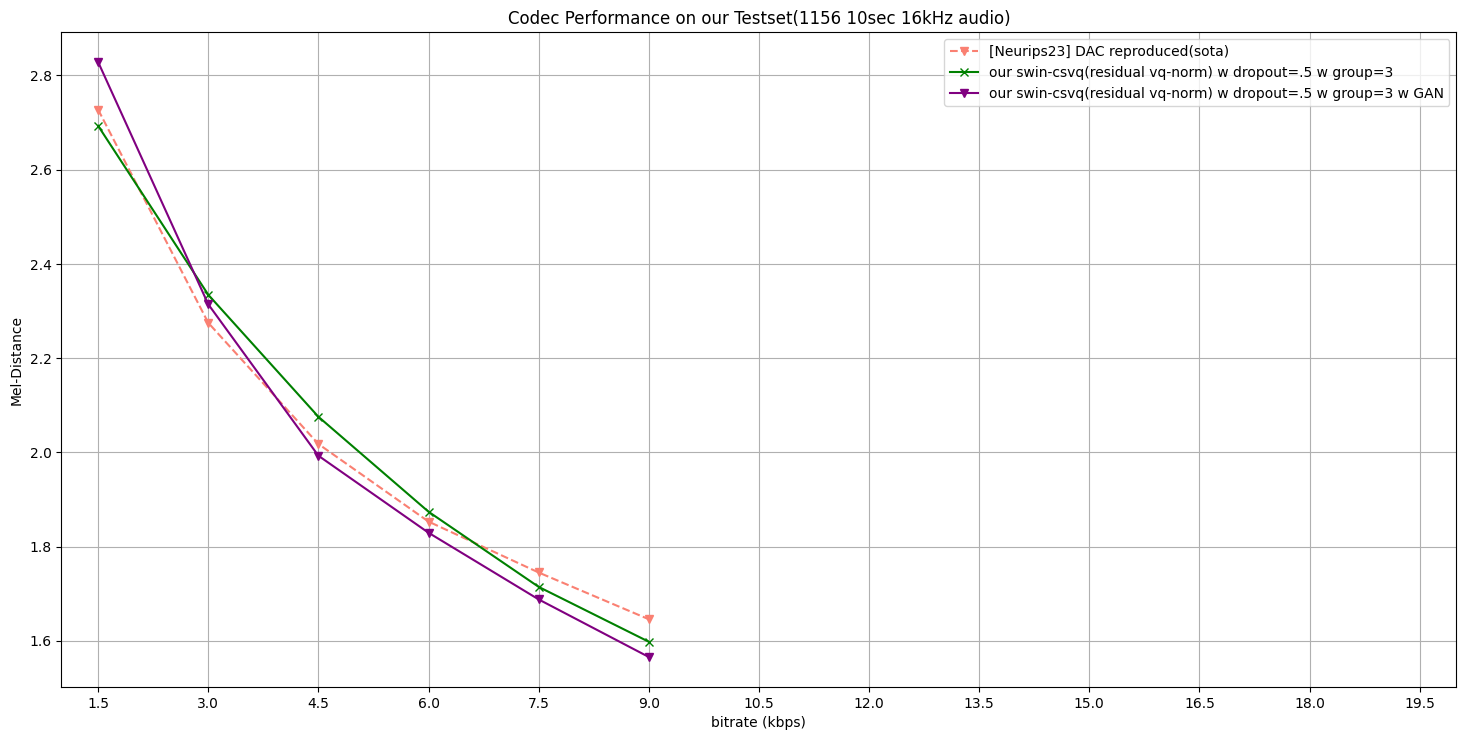

In [7]:
dac_reproduced = [2.6886, 2.2183, 1.9954, 1.8237] # 400k-iter
dac_9k_reproduced = [2.7276, 2.2751, 2.0179, 1.8532, 1.7451, 1.6459] # 9k version
dac_released = [4.5164, 3.6125, 2.9748, 2.3306]

swin_csvq_residual_9k = [2.6932, 2.3347, 2.0757, 1.8741, 1.7146, 1.5981]    # 400k-iter
swin_csvq_residual_9k_gan = [2.8287, 2.3144, 1.9930, 1.8295, 1.6880, 1.5658]

swin_csvq_residual_18k = [2.4822, 2.1089, 1.8974, 1.7241, 1.5673, 1.4772]

dac_bps = np.array([1.5, 3, 4.5, 6])
our9k_bps = np.arange(1.5,9.1,1.5)
out18k_bps = np.arange(3,18.1,3)

plt.figure(figsize=(18,8.5))
plt.title("Codec Performance on our Testset(1156 10sec 16kHz audio)")
plt.xlim((1,20))
plt.xticks(np.arange(1.5,21,1.5))

# plt.plot(dac_bps, dac_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
# plt.plot(dac_bps, dac_released, linestyle='--', marker='*', color='red', label="[Neurips23] DAC released(sota)")
plt.plot(our9k_bps, dac_9k_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
plt.plot(our9k_bps, swin_csvq_residual_9k, marker='x', color='green', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3")
plt.plot(our9k_bps, swin_csvq_residual_9k_gan, marker='v', color='purple', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3 w GAN")
# plt.plot(out18k_bps, swin_csvq_residual_18k, marker='o', color='tab:blue', label="our swin-csvq(residual vq-norm) w dropout=.5")

plt.xlabel("bitrate (kbps)")
plt.ylabel("Mel-Distance")
plt.grid()
plt.legend()
# plt.savefig(f"../assets/test_result_curve.jpg", dpi=200, bbox_inches='tight', pad_inches=.5)

plt.show()

### Codec VQ Evaluation

In [ ]:
from run_vq_stats import visualize
import json

# Trainset

eval_model = "swin-18k-residual"
split = "train"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

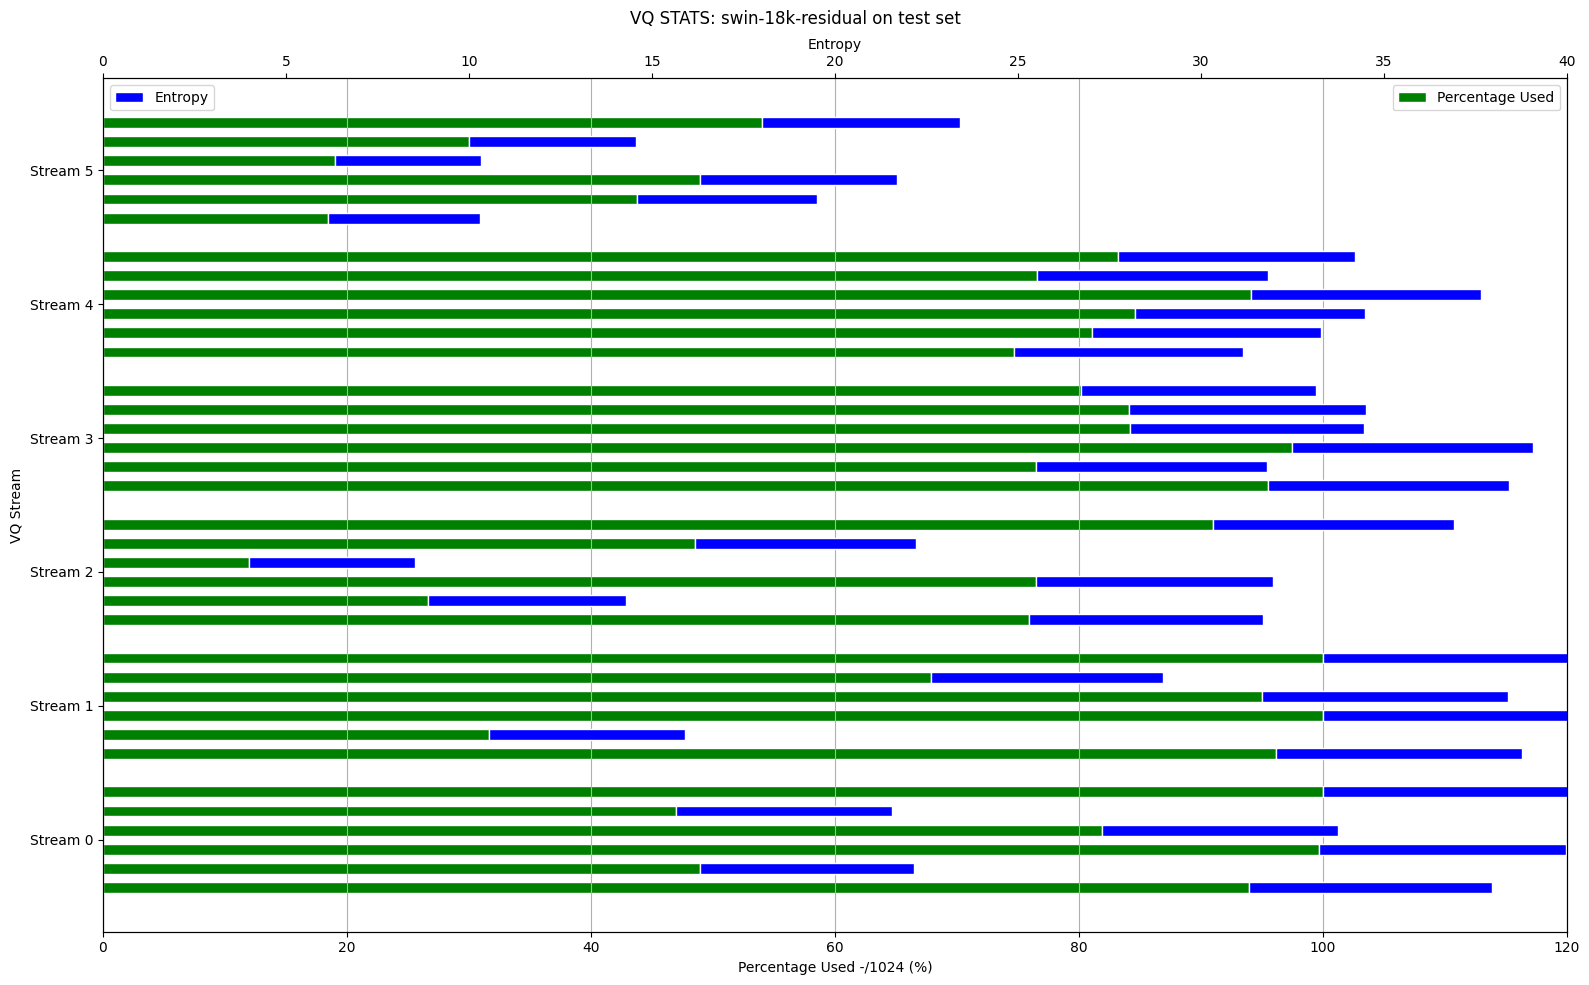

In [10]:
# Testset
eval_model = "swin-18k-residual"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

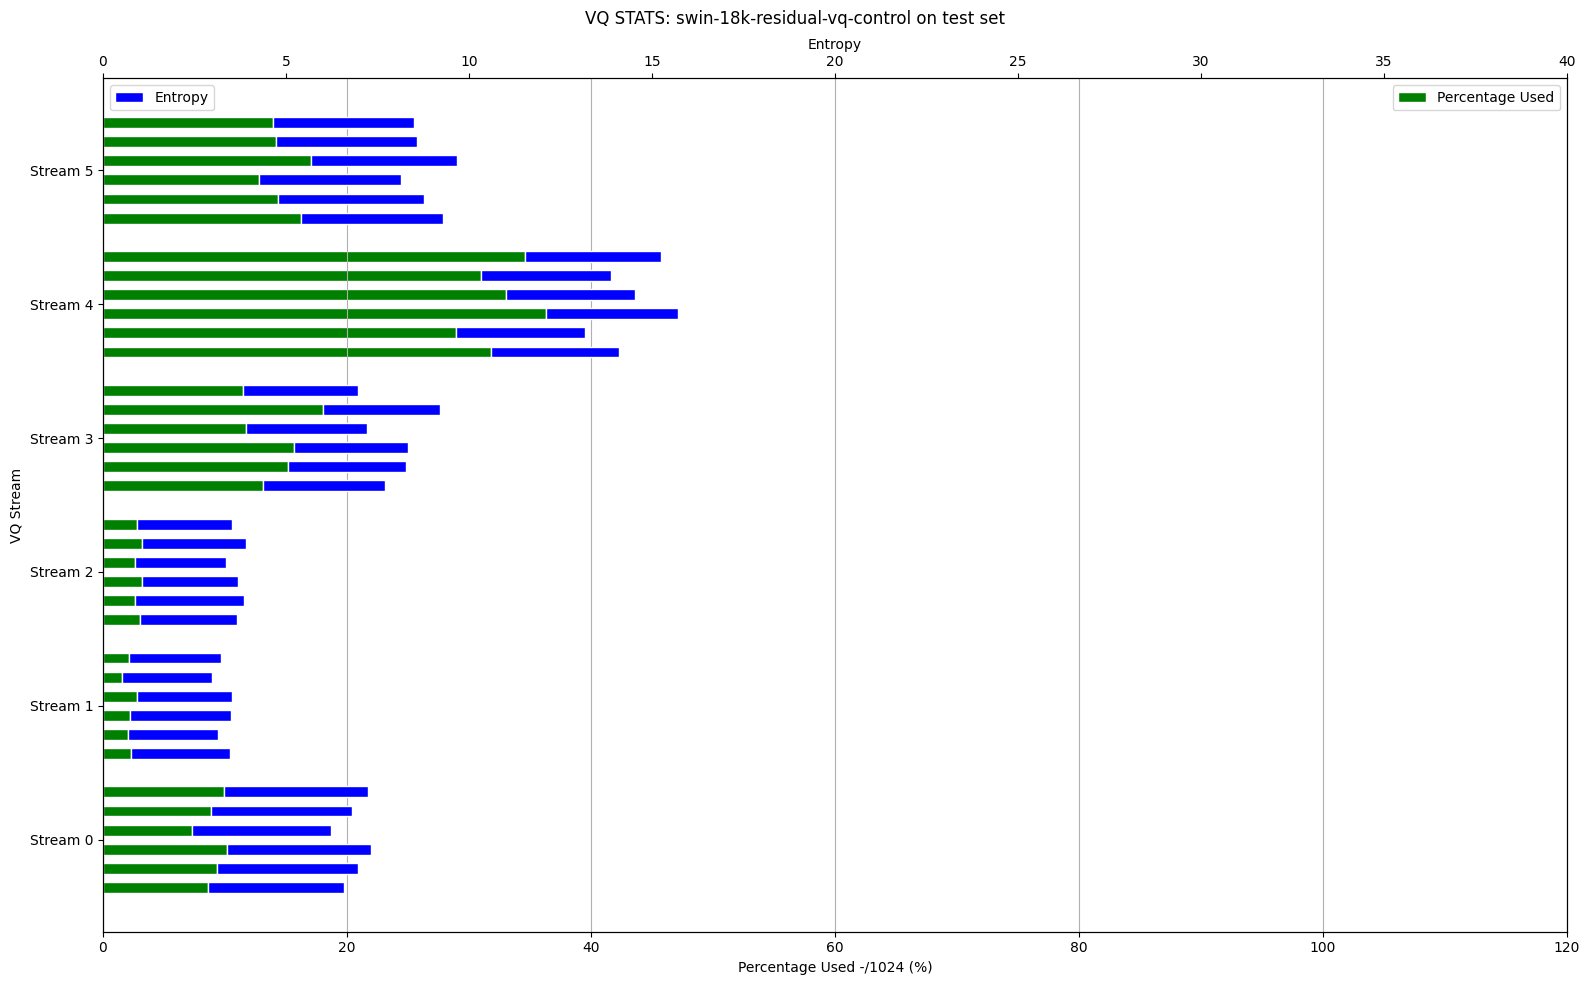

In [11]:
eval_model = "swin-18k-residual-vq-control"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

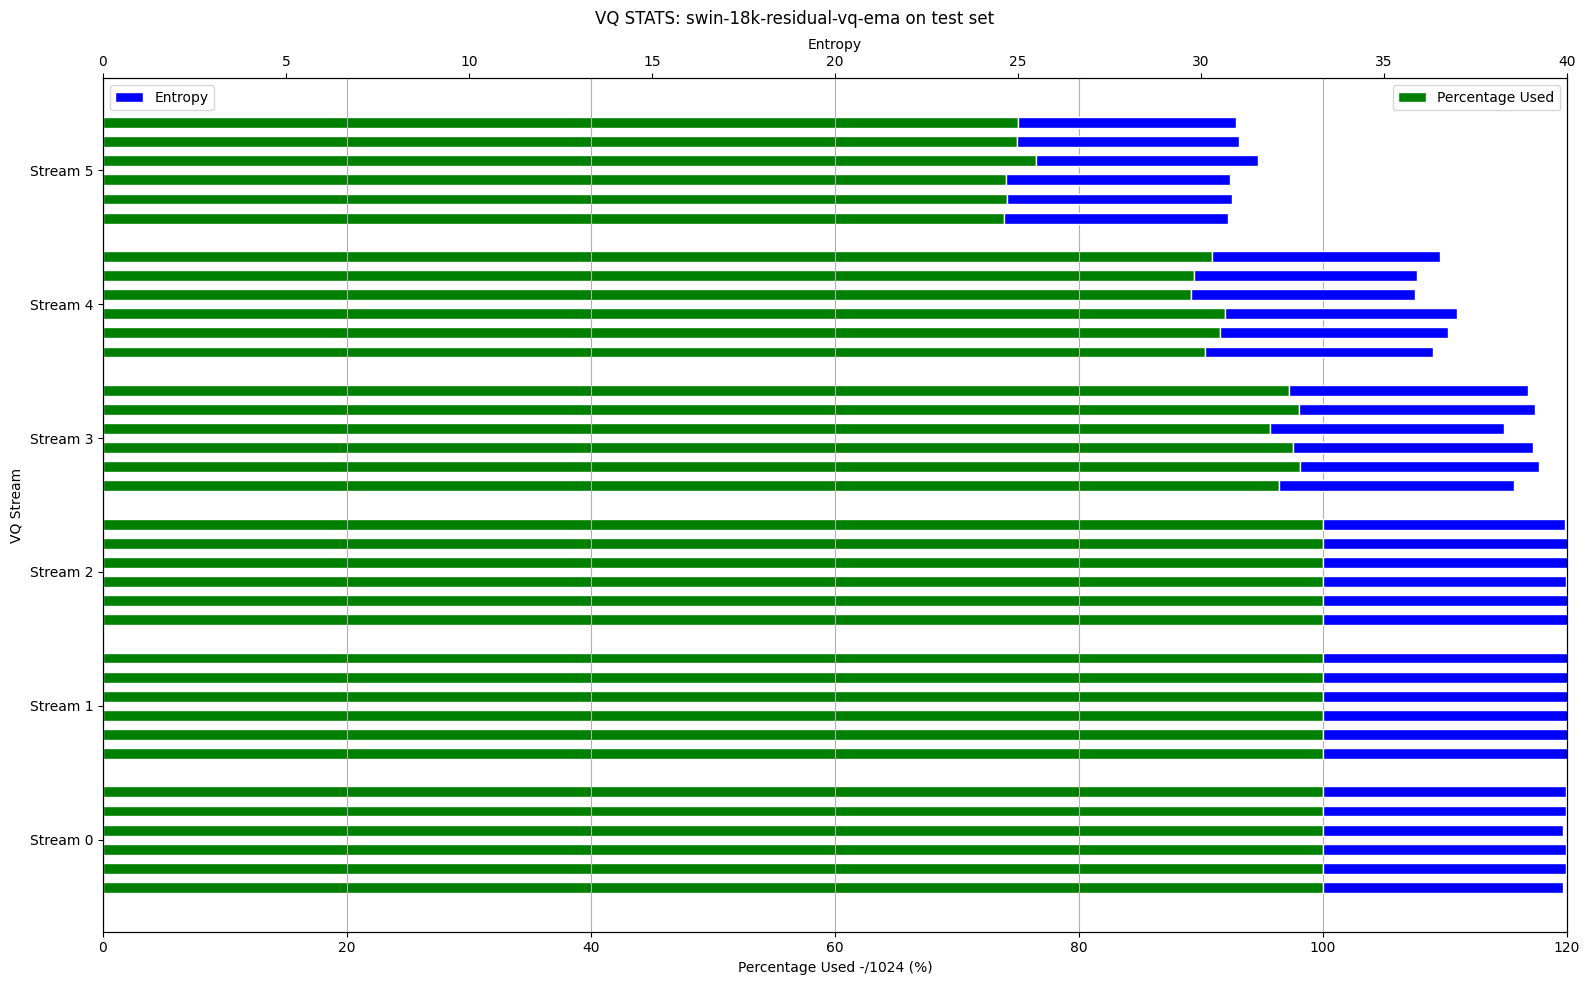

In [12]:
eval_model = "swin-18k-residual-vq-ema"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

In [28]:
import torch, torchaudio

sr = 24000
x = torch.randn(1, 10*sr-80)

In [29]:
trans = torchaudio.transforms.Spectrogram(
    win_length=20*sr//1000,
    hop_length=5*sr//1000,
    n_fft=(256-1)*2,
    power=None,
)

In [47]:
import torchaudio
x, _ = torchaudio.load("/Users/tracy/Desktop/Audio_Codec/swin-debug-vis/test/english_instance1.wav")

In [48]:
x.min(), x.max()

(tensor(-0.3415), tensor(0.3395))

In [75]:
z = torch.ones(4, 20, 8)
n_quantizers=12
mask = (
                torch.full((z.shape[0],), fill_value=0, device=z.device) < n_quantizers
            )

In [79]:
mask[:, None, None]

tensor([[[True]],

        [[True]],

        [[True]],

        [[True]]])

In [80]:
import torch

dist_uniform = torch.ones(1024) / 1024
dist_uniform

tensor([0.0010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.0010])

In [83]:
sum(dist_uniform * dist_uniform.log2())

tensor(-10.)

In [1]:
import torch, torchaudio

x = torch.randn(1, 47920)

In [14]:
trans = torchaudio.transforms.Spectrogram(
    n_fft=320, win_length=320, hop_length=80, power=None
)
trans(x).shape

torch.Size([1, 161, 600])

In [ ]:
import torch.nn as nn
from timm.models.layers import to_2tuple,trunc_normal_

class PatchEmbed(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super().__init__()

        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        num_patches = (img_size[1] // patch_size[1]) * (img_size[0] // patch_size[0])
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = num_patches

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x

x = PatchEmbed()

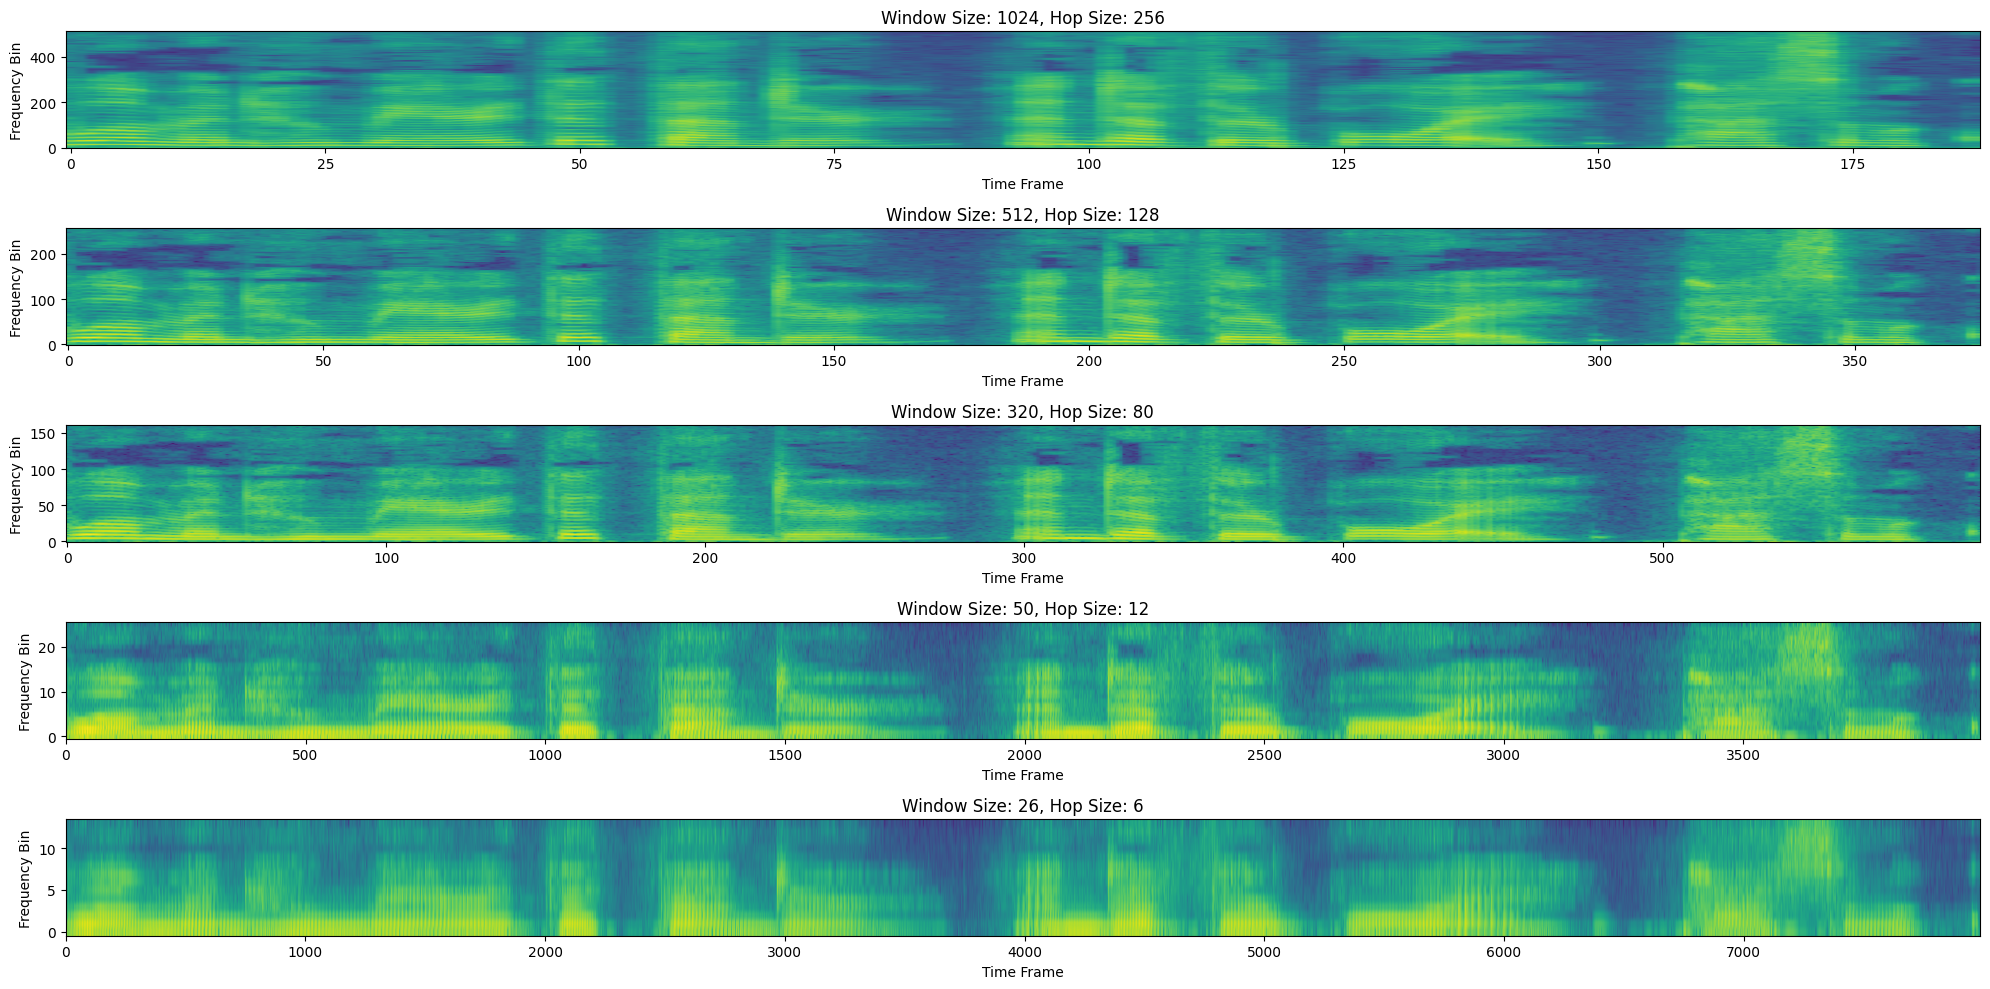

In [13]:
import matplotlib.pyplot as plt

# Generate a sine wave as a simple audio signal for demonstration
sample_rate = 16000
freq = 440  # Frequency in Hz
duration = 2  # Duration in seconds
t = torch.linspace(0, duration, int(sample_rate*duration))
audio = torch.sin(2 * torch.pi * freq * t)

audio = torchaudio.load("/Users/tracy/Desktop/mushra_evaluate/1-1158/clip_1.wav")[0][0]
audio = audio[:47920]
# Define window sizes and calculate hop sizes
window_sizes = [1024, 512, 320, 50, 26]
hop_sizes = [ws // 4 for ws in window_sizes]

# Plot STFTs with different window and hop sizes
fig, axs = plt.subplots(5, 1, figsize=(20, 10))

for i, (window_size, hop_size) in enumerate(zip(window_sizes, hop_sizes)):
    stft = torch.stft(audio, n_fft=window_size, hop_length=hop_size, window=torch.hann_window(window_size), return_complex=True)
    axs[i].imshow(torch.log(torch.abs(stft) + 1e-6).numpy(), aspect='auto', origin='lower')
    axs[i].set_title(f'Window Size: {window_size}, Hop Size: {hop_size}')
    axs[i].set_ylabel('Frequency Bin')
    axs[i].set_xlabel('Time Frame')

plt.tight_layout()
plt.show()


In [15]:
def make(x):
    return (1, 2), (3,4)

(x, y), (z, h) = make(x)

In [16]:
x, y, z, h

(1, 2, 3, 4)

In [7]:
import torch
x = torch.randn(600, 8)


torch.Size([1200, 8])

In [1]:
from models.codec import SwinAudioCodec

model = SwinAudioCodec(in_dim=2, in_freq=192, h_dims=[45,72,96,144,192,384], swin_depth=2, swin_heads=[3,6,12,24,24],window_size=4,
            mlp_ratio=4.0, max_streams=6, overlap=2, num_vqs=3, codebook_dims=[12])

Audio Codec 9.0kbps Initialized
Apply Vanilla Residual Fusion Net for Swin Codec
VQ-Type:  Group-VQ
Quantization Vis: 
     EMA: False CosineSimilarity: True
     Freq dims:  [2, 2, 4, 8, 16, 32]
     Channel(hidden) dims:  [384, 384, 192, 144, 96, 72]
     Merged dims:  [768, 768, 768, 1152, 1536, 2304]
     Group-VQ proj dims:  [768, 768, 768, 1152, 1536, 2304]
     Group-VQ dims (for each):  [512, 512, 512, 768, 1024, 1536]
     Mapped Codebook dims (for each):  [12, 12, 12, 12, 12, 12]
Pre-swin Layer: swin_depth=2 swin_hidden=45 heads=3 down=False
Layer[0]: swin_depth=2 swin_hidden=45 heads=3 down=True
Layer[1]: swin_depth=2 swin_hidden=72 heads=6 down=True
Layer[2]: swin_depth=2 swin_hidden=96 heads=12 down=True
Layer[3]: swin_depth=2 swin_hidden=144 heads=24 down=True
Layer[4]: swin_depth=2 swin_hidden=192 heads=24 down=True

Layer[0]: swin_depth=2 swin_hidden=384 heads=24 up=True
Layer[1]: swin_depth=2 swin_hidden=192 heads=24 up=True
Layer[2]: swin_depth=2 swin_hidden=144 heads

/Users/tracy/Library/Python/3.9/lib/python/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
import torch
x = torch.ones(1, 47920)
model.eval()
output1 = model.train_one_step(x, None, streams=6, freeze_codebook=True)
model.train()
output2 = model.test_one_step(x, None, streams=6, freeze_codebook=True)

/Users/tracy/Library/CloudStorage/GoogleDrive-cloudstorage.yuzhe@gmail.com/My Drive/Research/Audio_Signal_Coding/Deep-Audio-Signal-Coding/src/models/vq/kmeans_init.py:40: UserWarning: 
codebook size > warmup samples: 1024 vs 150. recommended to decrease the codebook size or increase batch size.
  warnings.warn(e_msg)


In [9]:
output2['recon_audio'][0,:20]

tensor([ 1.2299e-02,  3.3610e-02,  5.4472e-03,  9.7957e-03,  1.3007e-02,
        -7.4160e-03, -5.3826e-05, -1.4257e-03, -6.7094e-03,  6.5411e-03,
        -3.9799e-03, -2.8788e-03, -9.5334e-03, -5.3978e-04, -8.4388e-04,
        -8.2644e-03, -4.2679e-02,  3.2994e-03,  7.1129e-03, -1.3387e-02])

In [10]:
output1['recon_audio'][0,:20]

tensor([ 1.2302e-02,  3.3628e-02,  5.4416e-03,  9.7916e-03,  1.3025e-02,
        -7.3873e-03, -5.3026e-05, -1.4197e-03, -6.7064e-03,  6.5484e-03,
        -3.9948e-03, -2.8848e-03, -9.5385e-03, -5.5138e-04, -8.3870e-04,
        -8.2599e-03, -4.2667e-02,  3.3055e-03,  7.1125e-03, -1.3382e-02],
       grad_fn=<SliceBackward0>)

In [50]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1.0e-4)

In [63]:
x = torch.randn(4, 47920)
output = model.train_one_step(
    x, None, streams=0
)

In [64]:
loss = output["recon_loss"] + .25 * output["commitment_loss"] + output["codebook_loss"] + 0.25 * output["mel_loss"]

In [65]:
model.quantizer[0].vqs[0].proj_down.weight, model.encoder.pre_swin.swint_blocks[0].attn.qkv.weight, model.quantizer[0].vqs[0].embedding.weight

(Parameter containing:
 tensor([[-0.0443, -0.0288, -0.0304,  ...,  0.0231,  0.0186,  0.0069],
         [-0.0074,  0.0343,  0.0104,  ..., -0.0122, -0.0175,  0.0097],
         [-0.0083, -0.0404, -0.0011,  ...,  0.0344, -0.0263,  0.0108],
         ...,
         [-0.0230, -0.0402,  0.0307,  ..., -0.0349, -0.0103, -0.0257],
         [ 0.0133, -0.0387, -0.0033,  ..., -0.0399,  0.0057, -0.0438],
         [-0.0338,  0.0247, -0.0043,  ...,  0.0385,  0.0043,  0.0160]],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0161,  0.0230, -0.0764,  ..., -0.0210,  0.1340,  0.1174],
         [-0.1454, -0.0179, -0.0941,  ..., -0.0351,  0.0494, -0.0756],
         [-0.0593,  0.0108, -0.0729,  ..., -0.1353, -0.1077,  0.1035],
         ...,
         [ 0.1024, -0.0170, -0.0356,  ...,  0.0495, -0.1146, -0.1247],
         [ 0.1191, -0.0599,  0.0003,  ..., -0.0698, -0.0604,  0.1382],
         [ 0.0257, -0.1242, -0.1344,  ...,  0.1089, -0.0722,  0.0028]],
        requires_grad=True),
 Parameter con

In [66]:
optimizer.zero_grad()
loss.mean().backward()
optimizer.step()

In [68]:
model.quantizer[0].vqs[0].proj_down.weight, model.encoder.pre_swin.swint_blocks[0].attn.qkv.weight, model.quantizer[0].vqs[0].embedding.weight

(Parameter containing:
 tensor([[-0.0442, -0.0288, -0.0304,  ...,  0.0231,  0.0186,  0.0070],
         [-0.0075,  0.0343,  0.0103,  ..., -0.0123, -0.0176,  0.0096],
         [-0.0083, -0.0404, -0.0011,  ...,  0.0343, -0.0263,  0.0109],
         ...,
         [-0.0230, -0.0402,  0.0308,  ..., -0.0348, -0.0102, -0.0256],
         [ 0.0132, -0.0388, -0.0033,  ..., -0.0400,  0.0056, -0.0439],
         [-0.0337,  0.0248, -0.0042,  ...,  0.0386,  0.0044,  0.0161]],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0162,  0.0231, -0.0764,  ..., -0.0210,  0.1341,  0.1173],
         [-0.1453, -0.0180, -0.0941,  ..., -0.0352,  0.0493, -0.0756],
         [-0.0594,  0.0108, -0.0729,  ..., -0.1352, -0.1077,  0.1036],
         ...,
         [ 0.1025, -0.0169, -0.0355,  ...,  0.0495, -0.1145, -0.1246],
         [ 0.1191, -0.0599,  0.0004,  ..., -0.0699, -0.0605,  0.1382],
         [ 0.0256, -0.1241, -0.1345,  ...,  0.1090, -0.0721,  0.0027]],
        requires_grad=True),
 Parameter con